In [9]:
import numpy as np
import os
import random
import torch

from torch.utils.data import DataLoader, random_split

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMCoarseDataset, TransformDataset, find_overlapping_images, TensorFolderDataset

In [ ]:
# Definition of the Scenario, if Data Augmentation is Applied and the folder to store the weights
scenario = 2
data_augmentation = True
save_folder_base = f"./data/scenario{scenario}/"

In [ ]:
# Definition of the Data Folder and the initially set variables 
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
# BASE_DIR = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["nodule", "non-nodule"]
train_ratio = 0.6

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

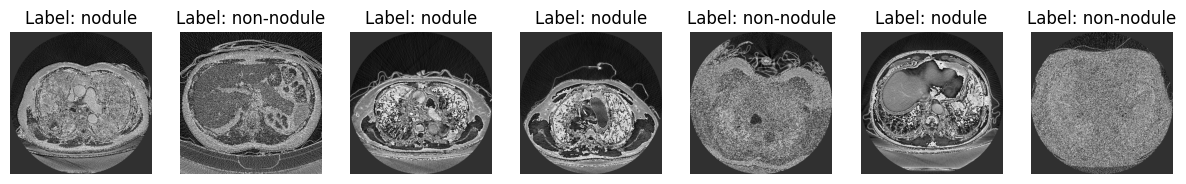

In [ ]:
# Visualization of different CT images from the Dataset with their correspongind labels
dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=len(os.listdir(os.path.join(BASE_DIR, "nodule"))), classes=classes, scenario=scenario)
# dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=100, classes=classes, scenario=1)
dataset.visualize_images(num_images=7)

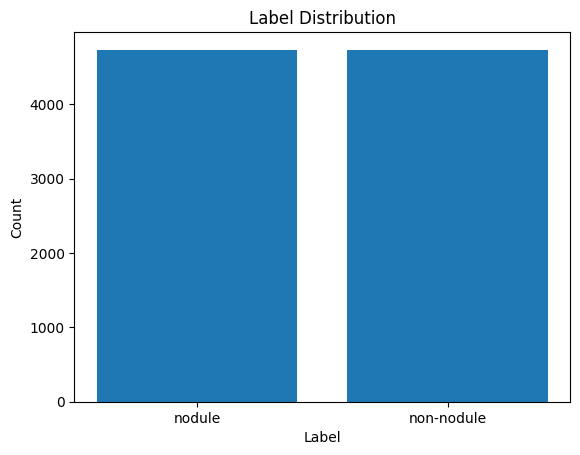

In [ ]:
# Visualization of the Label Distribution within the dataset
dataset.display_label_distribution()

In [ ]:
# Calculation of the Train, Validation and Test Size
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 5683 --- Validation size: 1894 --- Test size: 1895


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8848301..1.6394289].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8717766..2.343119].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7903491..1.5655998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0487983..2.4625087].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9268013..2.4018288].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9557326..1.9384176].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0299914

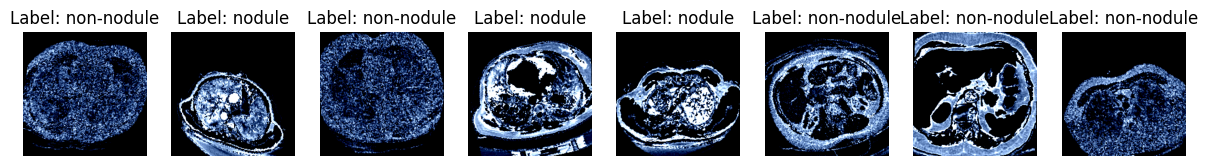

In [ ]:
# Visualization of CT images of the Dataset with the application of random data augmentation techniques
from utils import display_data_loader_batch
display_model = TransferLearningModel(classes, "resnet", data_augmentation=True, fine=False, scenario=1)
display_model.train_transforms, display_model.test_transforms = display_model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=display_model.train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
display_data_loader_batch(train_loader, classes)

In [ ]:
# Check for overlapping images in the different dataset splits
train_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "train_filtered"))
val_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "val_filtered"))
test_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "test"))

# Apply specific transforms to each subset
train_dataset = TransformDataset(train_dataset_base, transform=display_model.train_transforms)
val_dataset = TransformDataset(val_dataset_base, transform=display_model.test_transforms)
test_dataset = TransformDataset(test_dataset_base, transform=display_model.test_transforms)

find_overlapping_images(train_dataset, test_dataset)
find_overlapping_images(val_dataset, test_dataset)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:523: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Found 0 overlapping images
Found 0 overlapping images


[]

Processing model: resnet
Epoch 1/50 ----- Loss: 0.3270, Accuracy: 86.57% ----- Validation Loss: 0.5346, Validation Accuracy: 71.86%
Epoch 2/50 ----- Loss: 0.2073, Accuracy: 92.02% ----- Validation Loss: 0.3182, Validation Accuracy: 86.37%
Epoch 3/50 ----- Loss: 0.2016, Accuracy: 91.64% ----- Validation Loss: 0.1540, Validation Accuracy: 93.90%
Epoch 4/50 ----- Loss: 0.1656, Accuracy: 94.01% ----- Validation Loss: 0.2509, Validation Accuracy: 90.05%
Epoch 5/50 ----- Loss: 0.1468, Accuracy: 94.71% ----- Validation Loss: 0.3586, Validation Accuracy: 83.89%
Epoch 6/50 ----- Loss: 0.1534, Accuracy: 93.97% ----- Validation Loss: 0.1571, Validation Accuracy: 93.66%
Epoch 7/50 ----- Loss: 0.1475, Accuracy: 94.21% ----- Validation Loss: 0.1873, Validation Accuracy: 93.25%
Epoch 8/50 ----- Loss: 0.1511, Accuracy: 94.49% ----- Validation Loss: 0.1873, Validation Accuracy: 93.36%
Epoch 9/50 ----- Loss: 0.1448, Accuracy: 94.47% ----- Validation Loss: 0.2126, Validation Accuracy: 91.88%
Epoch 10/50 

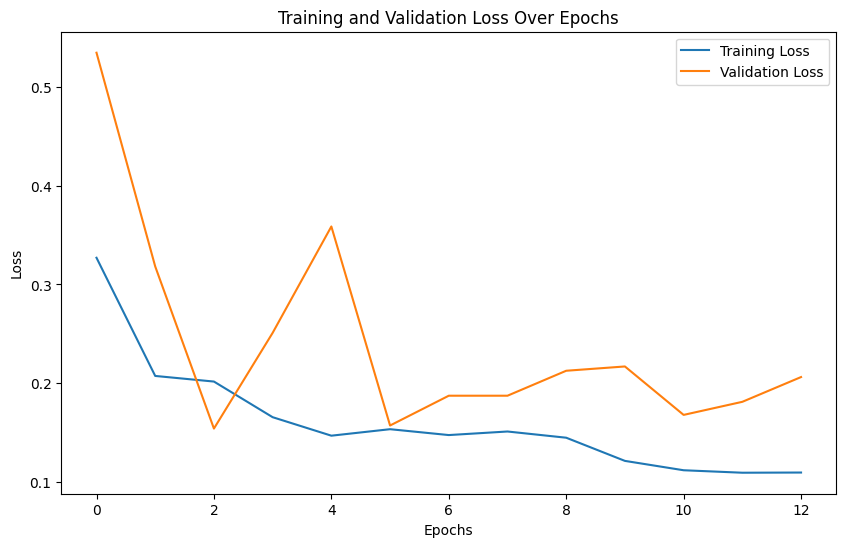

Processing model: densenet
Epoch 1/50 ----- Loss: 0.3119, Accuracy: 88.26% ----- Validation Loss: 0.2655, Validation Accuracy: 90.11%
Epoch 2/50 ----- Loss: 0.2256, Accuracy: 91.40% ----- Validation Loss: 0.2157, Validation Accuracy: 92.06%
Epoch 3/50 ----- Loss: 0.1761, Accuracy: 93.73% ----- Validation Loss: 0.1476, Validation Accuracy: 94.55%
Epoch 4/50 ----- Loss: 0.1581, Accuracy: 94.35% ----- Validation Loss: 0.1448, Validation Accuracy: 94.55%
Epoch 5/50 ----- Loss: 0.1550, Accuracy: 93.95% ----- Validation Loss: 0.1311, Validation Accuracy: 95.20%
Epoch 6/50 ----- Loss: 0.1371, Accuracy: 94.89% ----- Validation Loss: 0.1277, Validation Accuracy: 95.38%
Epoch 7/50 ----- Loss: 0.1376, Accuracy: 94.91% ----- Validation Loss: 0.1300, Validation Accuracy: 95.20%
Epoch 8/50 ----- Loss: 0.1246, Accuracy: 95.22% ----- Validation Loss: 0.1095, Validation Accuracy: 95.73%
Epoch 9/50 ----- Loss: 0.1195, Accuracy: 95.42% ----- Validation Loss: 0.1201, Validation Accuracy: 95.50%
Epoch 10/5

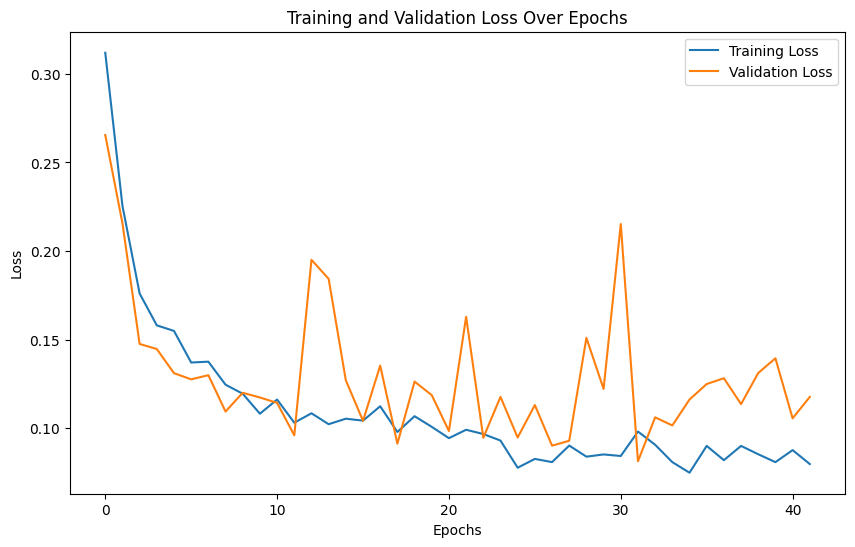

Processing model: efficientnet
Epoch 1/50 ----- Loss: 0.1234, Accuracy: 95.18% ----- Validation Loss: 0.0509, Validation Accuracy: 97.99%
Epoch 2/50 ----- Loss: 0.0244, Accuracy: 99.30% ----- Validation Loss: 0.0391, Validation Accuracy: 99.29%
Epoch 3/50 ----- Loss: 0.0215, Accuracy: 99.44% ----- Validation Loss: 0.0237, Validation Accuracy: 99.53%
Epoch 4/50 ----- Loss: 0.0152, Accuracy: 99.58% ----- Validation Loss: 0.0533, Validation Accuracy: 97.45%
Epoch 5/50 ----- Loss: 0.0131, Accuracy: 99.54% ----- Validation Loss: 0.0040, Validation Accuracy: 99.94%
Epoch 6/50 ----- Loss: 0.0094, Accuracy: 99.70% ----- Validation Loss: 0.0097, Validation Accuracy: 99.53%
Epoch 7/50 ----- Loss: 0.0059, Accuracy: 99.88% ----- Validation Loss: 0.0151, Validation Accuracy: 99.41%
Epoch 8/50 ----- Loss: 0.0076, Accuracy: 99.68% ----- Validation Loss: 0.0130, Validation Accuracy: 99.47%
Epoch 9/50 ----- Loss: 0.0041, Accuracy: 99.90% ----- Validation Loss: 0.0011, Validation Accuracy: 100.00%
Epoch

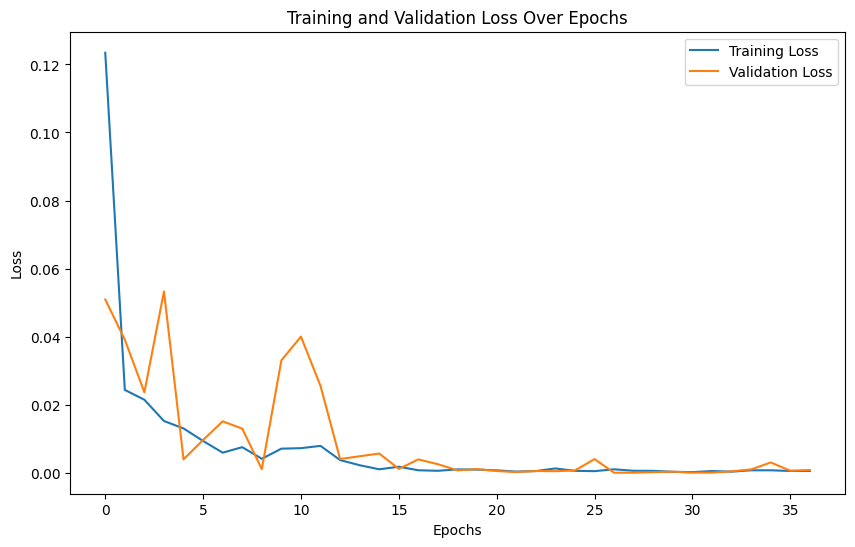

Processing model: efficientnet2
Epoch 1/50 ----- Loss: 0.1061, Accuracy: 95.74% ----- Validation Loss: 0.0264, Validation Accuracy: 99.05%
Epoch 2/50 ----- Loss: 0.0168, Accuracy: 99.44% ----- Validation Loss: 0.0164, Validation Accuracy: 99.47%
Epoch 3/50 ----- Loss: 0.0081, Accuracy: 99.66% ----- Validation Loss: 0.0026, Validation Accuracy: 100.00%
Epoch 4/50 ----- Loss: 0.0059, Accuracy: 99.76% ----- Validation Loss: 0.0248, Validation Accuracy: 99.05%
Epoch 5/50 ----- Loss: 0.0071, Accuracy: 99.78% ----- Validation Loss: 0.0727, Validation Accuracy: 97.22%
Epoch 6/50 ----- Loss: 0.0074, Accuracy: 99.80% ----- Validation Loss: 0.0006, Validation Accuracy: 100.00%
Epoch 7/50 ----- Loss: 0.0042, Accuracy: 99.86% ----- Validation Loss: 0.0004, Validation Accuracy: 100.00%
Epoch 8/50 ----- Loss: 0.0055, Accuracy: 99.86% ----- Validation Loss: 0.0167, Validation Accuracy: 99.35%
Epoch 9/50 ----- Loss: 0.0069, Accuracy: 99.70% ----- Validation Loss: 0.0049, Validation Accuracy: 99.82%
Ep

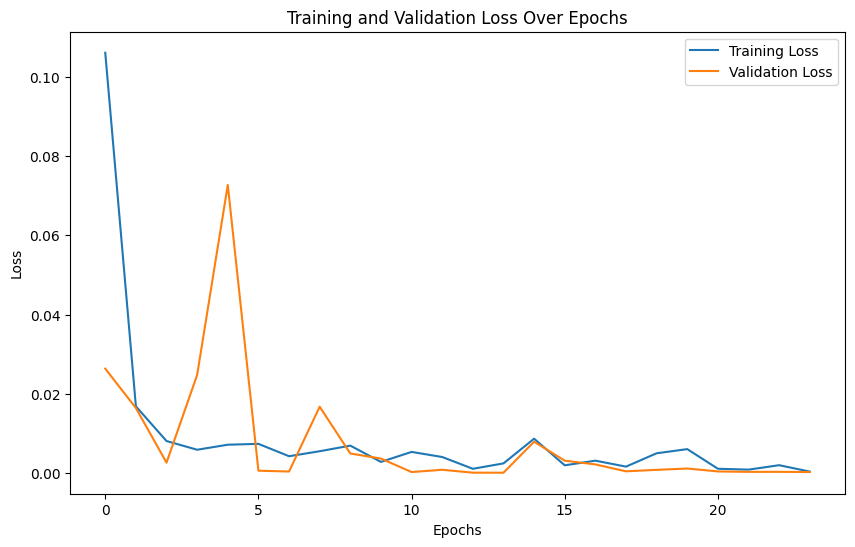

Processing model: efficientnet3
Epoch 1/50 ----- Loss: 0.1019, Accuracy: 96.14% ----- Validation Loss: 0.0400, Validation Accuracy: 99.11%
Epoch 2/50 ----- Loss: 0.0241, Accuracy: 99.28% ----- Validation Loss: 0.0066, Validation Accuracy: 99.94%
Epoch 3/50 ----- Loss: 0.0146, Accuracy: 99.54% ----- Validation Loss: 0.0084, Validation Accuracy: 99.64%
Epoch 4/50 ----- Loss: 0.0111, Accuracy: 99.64% ----- Validation Loss: 0.0059, Validation Accuracy: 99.76%
Epoch 5/50 ----- Loss: 0.0101, Accuracy: 99.66% ----- Validation Loss: 0.0171, Validation Accuracy: 99.41%
Epoch 6/50 ----- Loss: 0.0052, Accuracy: 99.80% ----- Validation Loss: 0.0005, Validation Accuracy: 100.00%
Epoch 7/50 ----- Loss: 0.0038, Accuracy: 99.94% ----- Validation Loss: 0.0018, Validation Accuracy: 99.94%
Epoch 8/50 ----- Loss: 0.0205, Accuracy: 99.38% ----- Validation Loss: 0.0030, Validation Accuracy: 99.94%
Epoch 9/50 ----- Loss: 0.0052, Accuracy: 99.88% ----- Validation Loss: 0.0002, Validation Accuracy: 100.00%
Epo

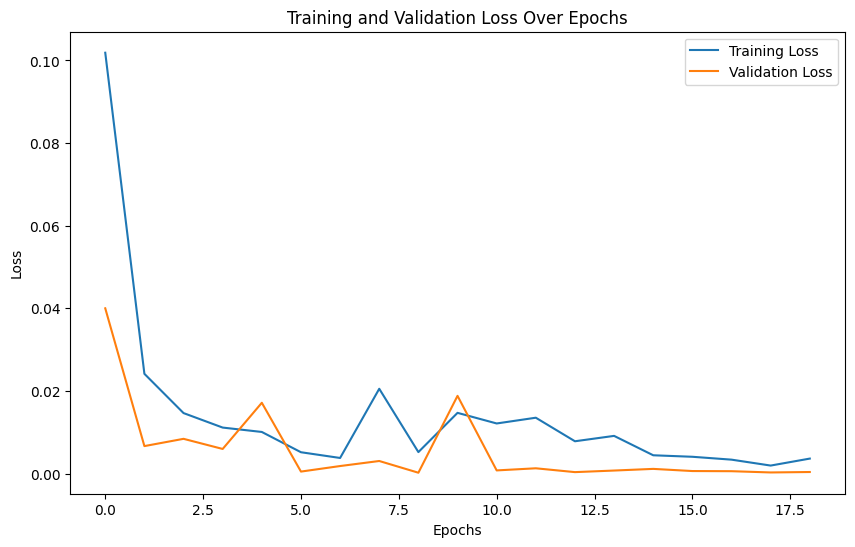

Processing model: vit


c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\.venv\lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1/50 ----- Loss: 0.2083, Accuracy: 91.86% ----- Validation Loss: 0.1701, Validation Accuracy: 93.31%
Epoch 2/50 ----- Loss: 0.1007, Accuracy: 96.82% ----- Validation Loss: 0.1969, Validation Accuracy: 91.88%
Epoch 3/50 ----- Loss: 0.0733, Accuracy: 97.89% ----- Validation Loss: 0.1587, Validation Accuracy: 93.48%
Epoch 4/50 ----- Loss: 0.0629, Accuracy: 97.93% ----- Validation Loss: 0.1826, Validation Accuracy: 92.54%
Epoch 5/50 ----- Loss: 0.0496, Accuracy: 98.57% ----- Validation Loss: 0.1747, Validation Accuracy: 92.77%
Epoch 6/50 ----- Loss: 0.0490, Accuracy: 98.45% ----- Validation Loss: 0.1113, Validation Accuracy: 95.68%
Epoch 7/50 ----- Loss: 0.0402, Accuracy: 98.85% ----- Validation Loss: 0.1302, Validation Accuracy: 94.85%
Epoch 8/50 ----- Loss: 0.0361, Accuracy: 99.06% ----- Validation Loss: 0.1121, Validation Accuracy: 95.38%
Epoch 9/50 ----- Loss: 0.0353, Accuracy: 98.99% ----- Validation Loss: 0.1435, Validation Accuracy: 93.96%
Epoch 10/50 ----- Loss: 0.0316, Accur

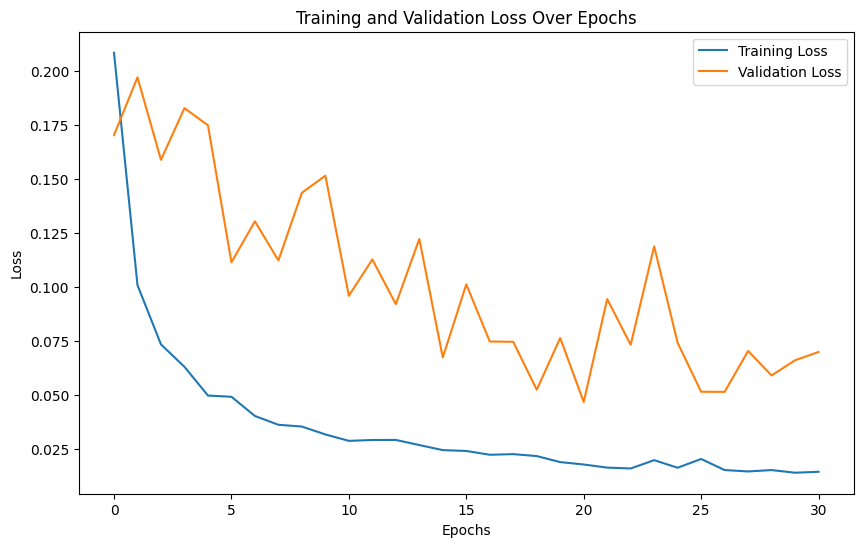

The best model is efficientnet2 with a validation loss of 0.0002
Processing model: resnet
Epoch 1/50 ----- Loss: 0.6451, Accuracy: 63.85% ----- Validation Loss: 0.8130, Validation Accuracy: 51.86%
Epoch 2/50 ----- Loss: 0.6027, Accuracy: 67.17% ----- Validation Loss: 0.5941, Validation Accuracy: 69.76%
Epoch 3/50 ----- Loss: 0.6062, Accuracy: 67.27% ----- Validation Loss: 0.6362, Validation Accuracy: 66.34%
Epoch 4/50 ----- Loss: 0.5991, Accuracy: 68.45% ----- Validation Loss: 0.6063, Validation Accuracy: 69.31%
Epoch 5/50 ----- Loss: 0.6158, Accuracy: 67.34% ----- Validation Loss: 0.6392, Validation Accuracy: 64.75%
Epoch 6/50 ----- Loss: 0.5973, Accuracy: 68.36% ----- Validation Loss: 0.5986, Validation Accuracy: 68.47%
Epoch 7/50 ----- Loss: 0.5935, Accuracy: 67.95% ----- Validation Loss: 0.6826, Validation Accuracy: 61.73%
Epoch 8/50 ----- Loss: 0.5871, Accuracy: 68.70% ----- Validation Loss: 0.6918, Validation Accuracy: 63.51%
Epoch 9/50 ----- Loss: 0.5648, Accuracy: 70.60% ----- 

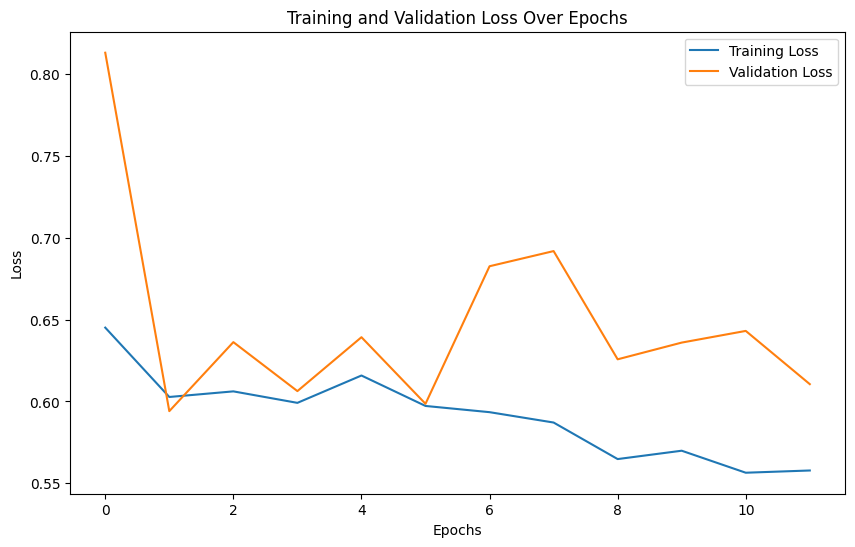

Processing model: densenet
Epoch 1/50 ----- Loss: 0.6298, Accuracy: 64.50% ----- Validation Loss: 0.7452, Validation Accuracy: 52.50%
Epoch 2/50 ----- Loss: 0.6104, Accuracy: 67.19% ----- Validation Loss: 0.6220, Validation Accuracy: 64.45%
Epoch 3/50 ----- Loss: 0.5874, Accuracy: 69.62% ----- Validation Loss: 0.7442, Validation Accuracy: 52.95%
Epoch 4/50 ----- Loss: 0.5843, Accuracy: 68.91% ----- Validation Loss: 0.5806, Validation Accuracy: 69.81%
Epoch 5/50 ----- Loss: 0.5840, Accuracy: 68.93% ----- Validation Loss: 0.6606, Validation Accuracy: 60.44%
Epoch 6/50 ----- Loss: 0.5784, Accuracy: 69.86% ----- Validation Loss: 0.5963, Validation Accuracy: 71.24%
Epoch 7/50 ----- Loss: 0.5729, Accuracy: 70.47% ----- Validation Loss: 0.5777, Validation Accuracy: 70.80%
Epoch 8/50 ----- Loss: 0.5697, Accuracy: 69.92% ----- Validation Loss: 0.5808, Validation Accuracy: 69.16%
Epoch 9/50 ----- Loss: 0.5760, Accuracy: 69.74% ----- Validation Loss: 0.5757, Validation Accuracy: 71.19%
Epoch 10/5

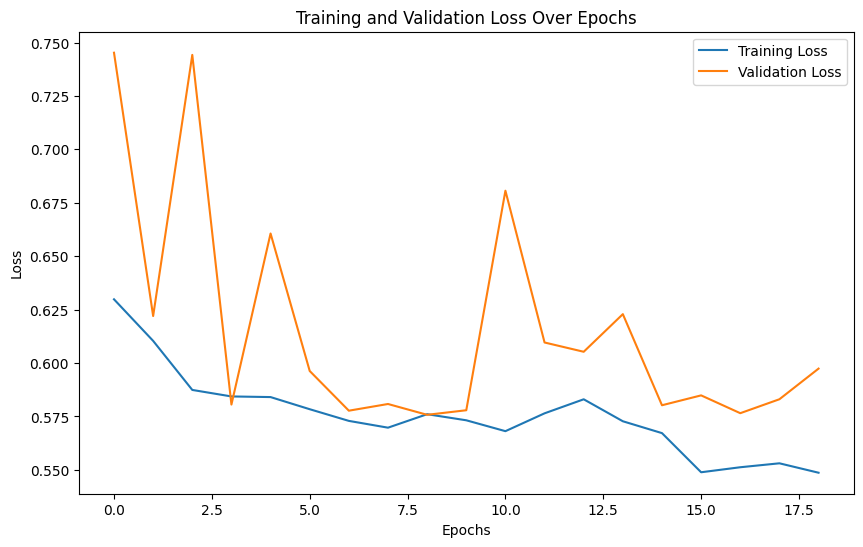

Processing model: efficientnet
Epoch 1/50 ----- Loss: 0.5810, Accuracy: 69.04% ----- Validation Loss: 0.5450, Validation Accuracy: 71.29%
Epoch 2/50 ----- Loss: 0.5123, Accuracy: 73.62% ----- Validation Loss: 0.5603, Validation Accuracy: 69.41%
Epoch 3/50 ----- Loss: 0.4689, Accuracy: 76.80% ----- Validation Loss: 0.4635, Validation Accuracy: 77.69%
Epoch 4/50 ----- Loss: 0.4315, Accuracy: 79.22% ----- Validation Loss: 0.5315, Validation Accuracy: 73.33%
Epoch 5/50 ----- Loss: 0.4001, Accuracy: 80.90% ----- Validation Loss: 0.4637, Validation Accuracy: 77.94%
Epoch 6/50 ----- Loss: 0.3795, Accuracy: 82.04% ----- Validation Loss: 0.4147, Validation Accuracy: 81.01%
Epoch 7/50 ----- Loss: 0.3651, Accuracy: 83.14% ----- Validation Loss: 0.4209, Validation Accuracy: 80.07%
Epoch 8/50 ----- Loss: 0.3498, Accuracy: 83.90% ----- Validation Loss: 0.3840, Validation Accuracy: 82.35%
Epoch 9/50 ----- Loss: 0.3295, Accuracy: 84.76% ----- Validation Loss: 0.3927, Validation Accuracy: 81.90%
Epoch 

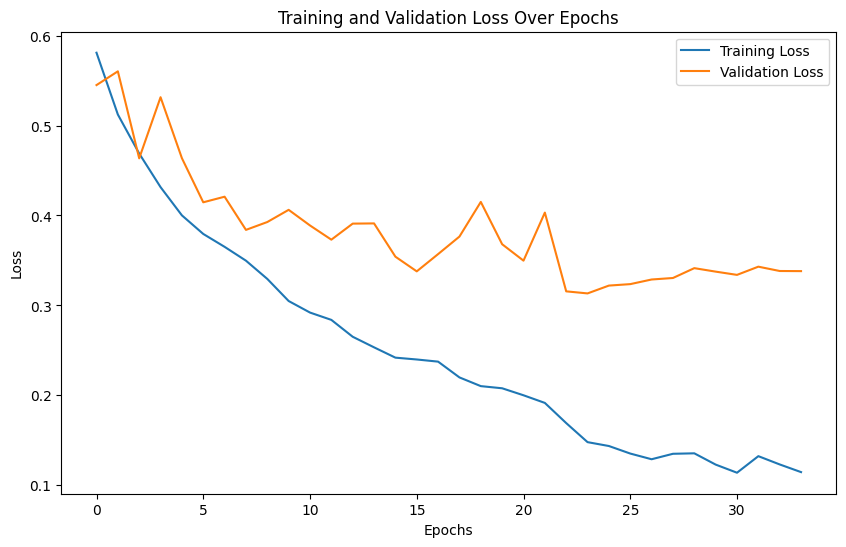

Processing model: efficientnet2
Epoch 1/50 ----- Loss: 0.5737, Accuracy: 69.72% ----- Validation Loss: 0.5445, Validation Accuracy: 70.90%
Epoch 2/50 ----- Loss: 0.4564, Accuracy: 77.55% ----- Validation Loss: 0.4706, Validation Accuracy: 76.95%
Epoch 3/50 ----- Loss: 0.3950, Accuracy: 81.28% ----- Validation Loss: 0.4305, Validation Accuracy: 78.93%
Epoch 4/50 ----- Loss: 0.3422, Accuracy: 84.61% ----- Validation Loss: 0.3919, Validation Accuracy: 83.44%
Epoch 5/50 ----- Loss: 0.3171, Accuracy: 85.67% ----- Validation Loss: 0.3719, Validation Accuracy: 83.59%
Epoch 6/50 ----- Loss: 0.2814, Accuracy: 88.13% ----- Validation Loss: 0.4105, Validation Accuracy: 82.35%
Epoch 7/50 ----- Loss: 0.2590, Accuracy: 88.72% ----- Validation Loss: 0.3366, Validation Accuracy: 86.02%
Epoch 8/50 ----- Loss: 0.2289, Accuracy: 90.86% ----- Validation Loss: 0.4275, Validation Accuracy: 84.48%
Epoch 9/50 ----- Loss: 0.2118, Accuracy: 91.91% ----- Validation Loss: 0.3663, Validation Accuracy: 86.91%
Epoch

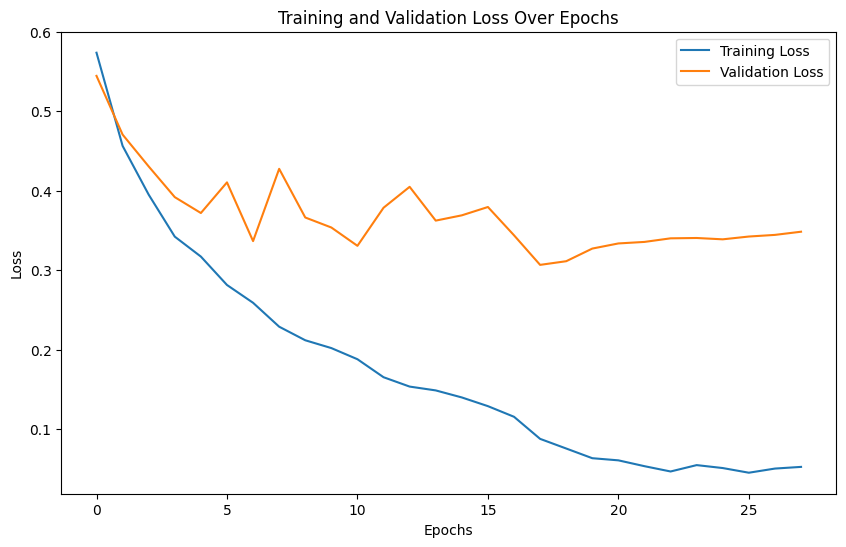

Processing model: efficientnet3
Epoch 1/50 ----- Loss: 0.6043, Accuracy: 67.40% ----- Validation Loss: 0.5487, Validation Accuracy: 69.11%
Epoch 2/50 ----- Loss: 0.4947, Accuracy: 75.01% ----- Validation Loss: 0.4587, Validation Accuracy: 77.64%
Epoch 3/50 ----- Loss: 0.4565, Accuracy: 77.47% ----- Validation Loss: 0.4442, Validation Accuracy: 77.19%
Epoch 4/50 ----- Loss: 0.4201, Accuracy: 79.89% ----- Validation Loss: 0.4117, Validation Accuracy: 79.62%
Epoch 5/50 ----- Loss: 0.4071, Accuracy: 81.06% ----- Validation Loss: 0.3904, Validation Accuracy: 80.91%
Epoch 6/50 ----- Loss: 0.3842, Accuracy: 82.52% ----- Validation Loss: 0.4129, Validation Accuracy: 79.33%
Epoch 7/50 ----- Loss: 0.3736, Accuracy: 82.67% ----- Validation Loss: 0.3814, Validation Accuracy: 81.71%
Epoch 8/50 ----- Loss: 0.3377, Accuracy: 84.68% ----- Validation Loss: 0.3831, Validation Accuracy: 81.76%
Epoch 9/50 ----- Loss: 0.3318, Accuracy: 84.99% ----- Validation Loss: 0.3665, Validation Accuracy: 83.09%
Epoch

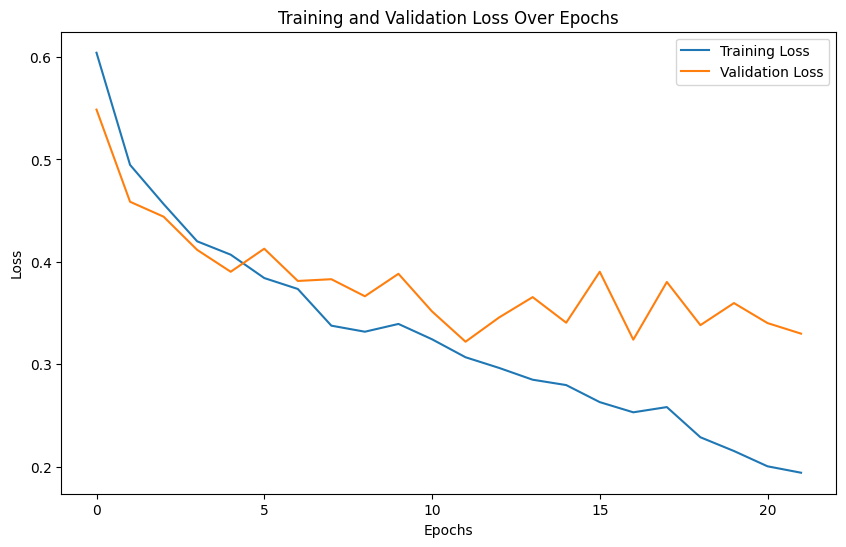

Processing model: vit
Epoch 1/50 ----- Loss: 0.5846, Accuracy: 69.66% ----- Validation Loss: 0.6053, Validation Accuracy: 66.53%
Epoch 2/50 ----- Loss: 0.5555, Accuracy: 71.96% ----- Validation Loss: 0.5648, Validation Accuracy: 70.65%
Epoch 3/50 ----- Loss: 0.5385, Accuracy: 72.77% ----- Validation Loss: 0.5938, Validation Accuracy: 66.73%
Epoch 4/50 ----- Loss: 0.5270, Accuracy: 73.34% ----- Validation Loss: 0.5628, Validation Accuracy: 71.69%
Epoch 5/50 ----- Loss: 0.5280, Accuracy: 72.96% ----- Validation Loss: 0.5564, Validation Accuracy: 70.40%
Epoch 6/50 ----- Loss: 0.5151, Accuracy: 73.44% ----- Validation Loss: 0.5681, Validation Accuracy: 69.56%
Epoch 7/50 ----- Loss: 0.5083, Accuracy: 74.65% ----- Validation Loss: 0.5634, Validation Accuracy: 69.51%
Epoch 8/50 ----- Loss: 0.5095, Accuracy: 74.80% ----- Validation Loss: 0.5546, Validation Accuracy: 69.76%
Epoch 9/50 ----- Loss: 0.5042, Accuracy: 75.06% ----- Validation Loss: 0.5366, Validation Accuracy: 72.48%
Epoch 10/50 ---

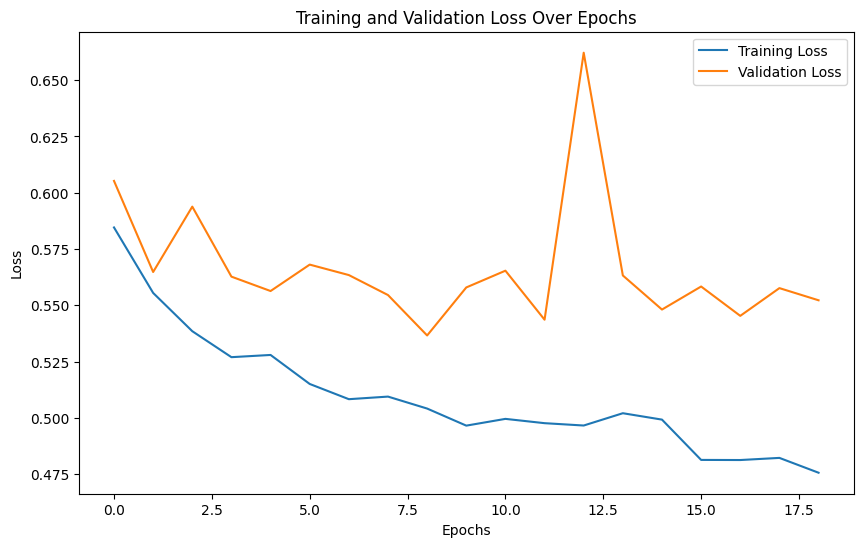

The best model is efficientnet3 with a validation loss of 0.3299


In [ ]:
# Iterate through the different 2D transfer learning classifiers and execute the training process for each and safe
# the best performing model based on the validation loss during the training stage
scenarios = [2, 3]
for scenario in scenarios:
    model_names = ["resnet", "densenet", "efficientnet", "efficientnet2", "efficientnet3", "vit"]
    best_val_loss = float('inf')
    best_model = None
    save_folder_base = f"./data/scenario{scenario}/"
    train_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "train_filtered"))
    val_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "val_filtered"))
    test_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "test"))

    for model_name in model_names:
        print(f"Processing model: {model_name}")
        current_model = TransferLearningModel(classes, model_name, data_augmentation=data_augmentation, fine=False, scenario=scenario)

        # Ensure transforms are correctly applied based on model requirements
        current_model.train_transforms, current_model.test_transforms = current_model.get_transforms()
        # Apply specific transforms to each subset
        train_dataset = TransformDataset(train_dataset_base, transform=current_model.train_transforms)
        val_dataset = TransformDataset(val_dataset_base, transform=current_model.test_transforms)
        test_dataset = TransformDataset(test_dataset_base, transform=current_model.test_transforms)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize early stopping
        early_stopping = EarlyStopping(patience=10)

        # Train the current model
        current_model.train(train_loader, val_loader, early_stopping, epochs=50)

        # Track the best model based on validation loss
        final_val_loss = current_model.val_losses[-1]
        if final_val_loss < best_val_loss:
            best_val_loss = final_val_loss
            best_model = current_model

    print(f"The best model is {best_model.model_name} with a validation loss of {best_val_loss:.4f}")

Best model: efficientnet3


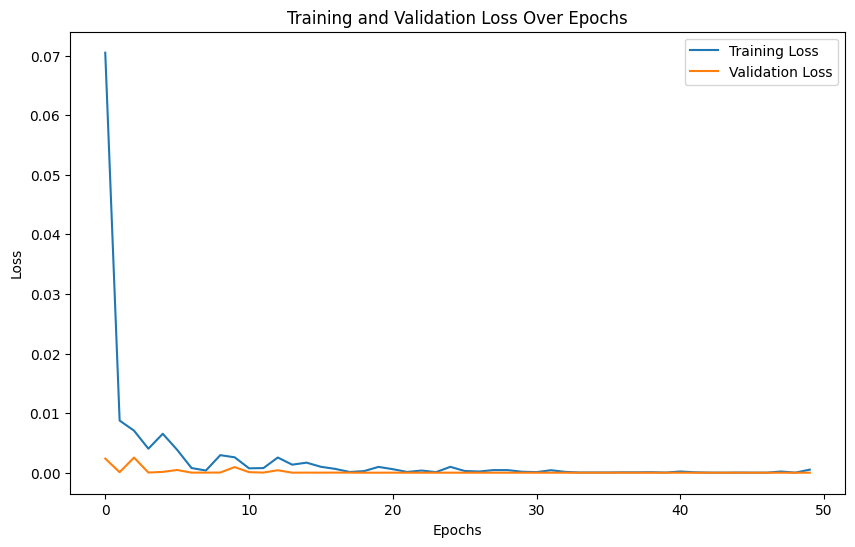

In [ ]:
# Visualization of the training and validation loss for the best performing model in this scenario
print(f"Best model: {best_model.model_name}")
best_model.plot_loss()

Best model: efficientnet
0.291640086042702
Evaluation Accuracy on unseen data: 88.07464724624488


<Figure size 1000x800 with 0 Axes>

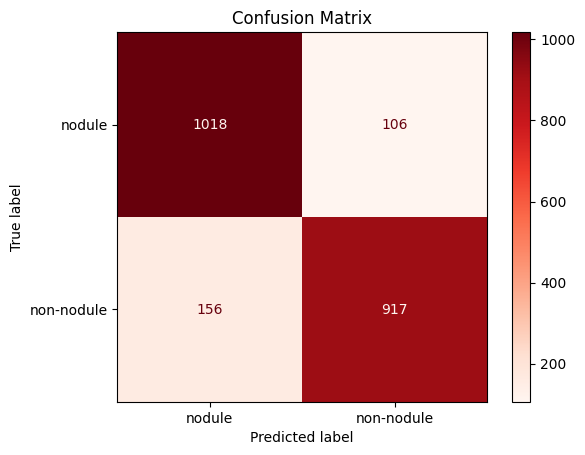

In [ ]:
# Load the best model from the weights and execute the evaluation process
print(f"Best model: {best_model.model_name}")
if data_augmentation:
    checkpoint = torch.load(f"weights/coarse/scenario{scenario}/augmented_{best_model.model_name}.pt", weights_only=False)
else:
    checkpoint = torch.load(f"weights/coarse/scenario{scenario}/{best_model.model_name}.pt", weights_only=False)
best_model.model.load_state_dict(checkpoint['model_state_dict'])
loss = checkpoint["loss"]
print(loss)
best_model.evaluate(test_loader)

0.008643176407847397


c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:514: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Evaluation Accuracy on unseen data: 99.73614775725594


<Figure size 1000x800 with 0 Axes>

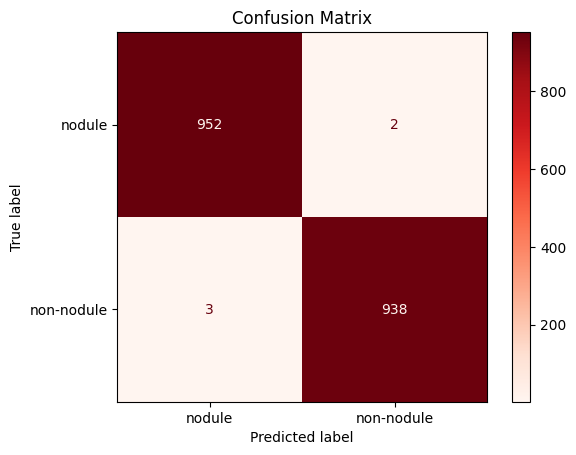

In [ ]:
# Evaluation for the trained model on one scenario and the evaluation on another scenario
scenario_model = 2
scenario_test = 2
data_augmentation = False
test_model_name = "vit"

test_model = TransferLearningModel(classes, test_model_name, data_augmentation=data_augmentation, scenario=scenario_model)
test_model.train_transforms, test_model.test_transforms = test_model.get_transforms()
test_dataset = TransformDataset(test_dataset_base, transform=test_model.test_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
checkpoint = torch.load(f"weights/coarse/scenario{scenario_model}/{test_model.model_name}.pt", weights_only=False)
test_model.model.load_state_dict(checkpoint['model_state_dict'])
loss = checkpoint["loss"]
print(loss)
test_model.evaluate(test_loader)